In [5]:
from PIL import Image
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Load the images and the filename

In [2]:
DIR = '/content/drive/MyDrive/CV/strawberries/'
image_list = []
labels = []
for pth in os.listdir(DIR):
    fn = DIR + pth
    im = cv2.imread(fn)
    labels.append(fn)
    image_list.append(im.copy())

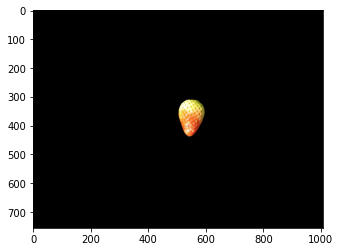

In [3]:
plt.imshow(cv2.cvtColor(image_list[2], cv2.COLOR_BGR2RGB))

In [4]:
len(image_list)

157

In [4]:
ImageMatrix = [np.array(x) for x in image_list]

Get the Y vector by parsing the filenames

In [5]:
Y = np.array([int(x[-5]) for x in labels])
Y.shape

(157,)

In [6]:
X = []
for img in ImageMatrix:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue = img[:, :, 0].flatten()
    light = img[:, :, 2].flatten()
    red_count = 0
    pixel_count = 0
    for i, val in enumerate(hue):
        if light[i] == 0:
            continue
        
        pixel_count += 1
        h = hue[i]
        if (h <= 10 and h >= 0) or (h >= 160 and h<= 180):
            red_count += 1
    X.append(red_count/pixel_count)

KeyboardInterrupt: ignored

In [6]:
X

[0.16937669376693767,
 0.3247086247086247,
 0.17381725417439703,
 0.7580936878278169,
 0.024922118380062305,
 0.0551247709008882,
 0.01485148514851485,
 0.9607903201102772,
 0.9068822974835014,
 0.0,
 0.0,
 0.0,
 0.042116630669546434,
 0.7657739906674782,
 0.0,
 0.0,
 0.0010897203051216855,
 0.001466275659824047,
 0.0,
 0.3157279738256602,
 0.0007329587099926704,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9705292393149205,
 0.0,
 0.0,
 0.0,
 0.9482758620689655,
 0.0029455081001472753,
 0.0005716735743890238,
 0.0,
 0.0,
 0.0,
 0.7082936129647283,
 0.8702702702702703,
 0.005447470817120622,
 0.3128595600676819,
 0.7654137129921963,
 0.0,
 0.0,
 0.00010098969905069682,
 0.0,
 0.0,
 0.0,
 0.27740828148465996,
 0.42312971859986276,
 0.6543846720707442,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000945179584120983,
 0.0014794408733802672,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8790806129247168,
 0.47118202539889287,
 0.7344827586206897,
 0.0,
 0.0,
 0.0013357928884930985,
 0.0,
 0.0005518154729058603,
 0.8544563552833078,
 0.0,

In [8]:
import json

# Data to be written
dictionary = {
    "X": X,
    "Y": Y.tolist(),
}

# Serializing json
json_object = json.dumps(dictionary, indent=4)

# Writing to sample.json
with open("PixelData.json", "w") as outfile:
  outfile.write(json_object)

In [1]:
import json

with open('PixelData.json', 'r') as openfile:
  json_object = json.load(openfile)

In [133]:
X = json_object["X"]
Y = json_object["Y"]

In [92]:
def NaivePredict(X, thresh1, thresh2):
  return [0 if (x < thresh1) else 1 if (x < thresh2) else 2 for x in X]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)
accuracy = []
thresholds = []
for i in np.arange(0,100,0.1):
  for j in np.arange(i,100,0.1):
    y_pred = NaivePredict(X_train, i, j)
    accuracy.append(accuracy_score(y_train,y_pred))
    thresholds.append([i,j])

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)

In [136]:
len(X_train)

125

In [94]:
optimal_thresh = thresholds[accuracy.index(max(accuracy))]

In [95]:
optimal_thresh

[0.1, 0.7000000000000001]

In [97]:
accuracy_score(y_train,NaivePredict(X_train, optimal_thresh[0], optimal_thresh[1]))

0.952

In [98]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[24  0  0]
 [ 2  3  1]
 [ 0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.75      0.50      0.60         6
           2       0.50      0.50      0.50         2

    accuracy                           0.88        32
   macro avg       0.72      0.67      0.69        32
weighted avg       0.86      0.88      0.86        32

Accuracy: 0.875


In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


knn_clf=SVC()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[24  0  0]
 [ 3  2  1]
 [ 0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       0.67      0.33      0.44         6
           2       0.50      0.50      0.50         2

    accuracy                           0.84        32
   macro avg       0.69      0.61      0.63        32
weighted avg       0.82      0.84      0.82        32

Accuracy: 0.84375


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(X_train,y_train)
ypred=model.predict(X_train) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#result = confusion_matrix(y_test, ypred)
#print("Confusion Matrix:")
#print(result)
#result1 = classification_report(y_test, ypred)
#print("Classification Report:",)
#print (result1)
result2 = accuracy_score(y_train,ypred)
print("Accuracy:",result2)

Accuracy: 0.96


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

knn_clf=RandomForestClassifier(n_estimators=100, random_state=2)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[24  0  0]
 [ 1  4  1]
 [ 0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       0.80      0.67      0.73         6
           2       0.50      0.50      0.50         2

    accuracy                           0.91        32
   macro avg       0.75      0.72      0.74        32
weighted avg       0.90      0.91      0.90        32

Accuracy: 0.90625


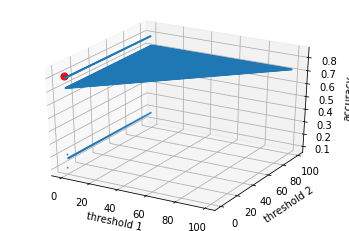

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(0.5,0.5,0.8125, color='r',s=50)
ax.scatter(np.transpose(np.array(thresholds))[0], np.transpose(np.array(thresholds))[1], np.array(accuracy),s=1)


ax.set_xlabel('threshold 1')
ax.set_ylabel('threshold 2')
ax.set_zlabel('accuracy')
plt.show()

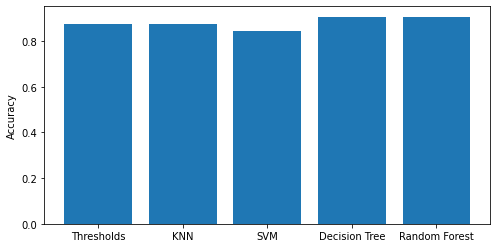

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(1, [8, 4])
model_name = ['Thresholds', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
acc = [0.875,0.875,0.84375,0.90625,0.90625]
plt.bar(model_name,acc)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
numColorPixels = [np.count_nonzero(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)) for x in ImageMatrix]
X = [np.sum(x, axis=(0,1))[0] for x in ImageMatrix]
X =  np.array(X) / np.array(numColorPixels)
X = X.reshape(-1, 1)

Calculate the thresholds

In [27]:
X = np.array(X).reshape(-1, 1)

In [31]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)

knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[24  0  0]
 [ 2  3  1]
 [ 0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.75      0.50      0.60         6
           2       0.50      0.50      0.50         2

    accuracy                           0.88        32
   macro avg       0.72      0.67      0.69        32
weighted avg       0.86      0.88      0.86        32

Accuracy: 0.875


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)

knn_clf=SVC()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[1 1 0]
 [0 1 0]
 [0 1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4

Accuracy: 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RGB Feature extraction with KNN

In [59]:
import pandas as pd

In [102]:
data = pd.read_csv(r'/content/drive/MyDrive/CV/training.csv')
data

,id,centroid,label
0,1000_0_0,[0.28752327 0.62853798 0.68229548],0
1,1000_1_1,[0.2467438 0.46078222 0.87668347],1
2,1000_2_0,[0.27016352 0.66163218 0.63288337],0
3,1001_0_0,[0.32629577 0.6471068 0.68737473],0
4,1001_1_2,[0.24888546 0.34252655 0.87061166],2
...,...,...,...
17296,99_7_0,[0.09142759 0.51152609 0.51028377],0
17297,9_0_1,[0.27088548 0.55172172 0.80039168],1
17298,9_1_1,[0.30112394 0.55481501 0.82947997],1
17299,9_2_2,[0.26625816 0.37873962 0.84253678],2


In [103]:
X = [np.fromstring(x[1:-1], dtype=float, sep=' ') for x in data.centroid.tolist()]
X

[array([0.28752327, 0.62853798, 0.68229548]),
 array([0.2467438 , 0.46078222, 0.87668347]),
 array([0.27016352, 0.66163218, 0.63288337]),
 array([0.32629577, 0.6471068 , 0.68737473]),
 array([0.24888546, 0.34252655, 0.87061166]),
 array([0.01177749, 0.43905007, 0.42146864]),
 array([0.17557728, 0.53397377, 0.48177013]),
 array([0.06250533, 0.60744584, 0.54973331]),
 array([0.09955596, 0.12368462, 0.32488237]),
 array([0.09351614, 0.30313368, 0.26180488]),
 array([0.04546694, 0.09689156, 0.50907054]),
 array([0.16400577, 0.67131044, 0.65003052]),
 array([0.36096894, 0.64843505, 0.68419298]),
 array([0.21667723, 0.68649851, 0.66367843]),
 array([0.07854536, 0.54049341, 0.55561035]),
 array([0.11862163, 0.63690192, 0.63180125]),
 array([0.04590745, 0.38329451, 0.311328  ]),
 array([0.08025319, 0.35991662, 0.31760495]),
 array([0.27669071, 0.66939513, 0.64135353]),
 array([0.27950826, 0.29476104, 0.83357011]),
 array([0.20868708, 0.67144745, 0.64158491]),
 array([0.31814585, 0.67707356, 0.

In [104]:
Y = np.array([int(x[-1]) for x in data.id])
Y

array([0, 1, 0, ..., 1, 2, 1])

In [109]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)
ACC = []
for k in [1,2,3,4,5,6,7,8,9,10,15, 20,30,50,80,100]:

  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  ypred=knn_clf.predict(X_test) #These are the predicted output values

  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


  ACC.append(accuracy_score(y_test,ypred))


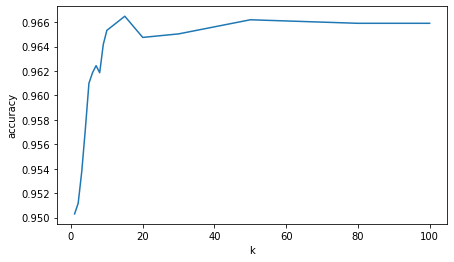

In [132]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot([1,2,3,4,5,6,7,8,9,10,15, 20,30,50,80,100], ACC)
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
fig.show()

In [64]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


knn_clf=SVC()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[2507   16    0]
 [  11  512   38]
 [   0   44  333]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2523
           1       0.90      0.91      0.90       561
           2       0.90      0.88      0.89       377

    accuracy                           0.97      3461
   macro avg       0.93      0.93      0.93      3461
weighted avg       0.97      0.97      0.97      3461

Accuracy: 0.9685062120774343


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


model = DecisionTreeClassifier(max_depth=70,random_state=0)
model.fit(X_train,y_train)
ypred=model.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[2496   27    0]
 [  19  478   64]
 [   0   62  315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2523
           1       0.84      0.85      0.85       561
           2       0.83      0.84      0.83       377

    accuracy                           0.95      3461
   macro avg       0.89      0.89      0.89      3461
weighted avg       0.95      0.95      0.95      3461

Accuracy: 0.9503033805258596


In [83]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

knn_clf=RandomForestClassifier(n_estimators=200, random_state=2)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[2506   17    0]
 [  17  499   45]
 [   0   49  328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2523
           1       0.88      0.89      0.89       561
           2       0.88      0.87      0.87       377

    accuracy                           0.96      3461
   macro avg       0.92      0.92      0.92      3461
weighted avg       0.96      0.96      0.96      3461

Accuracy: 0.9630164692285467


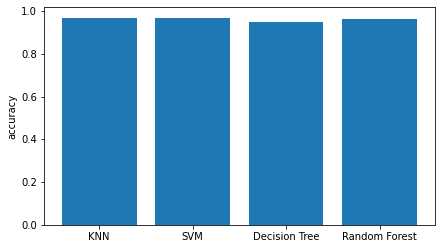

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(1, [7, 4])
model_name = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
acc = [0.9656168737359144,0.9685062120774343,0.9503033805258596,0.9630164692285467]
plt.bar(model_name,acc)
plt.ylabel('accuracy')
plt.show()

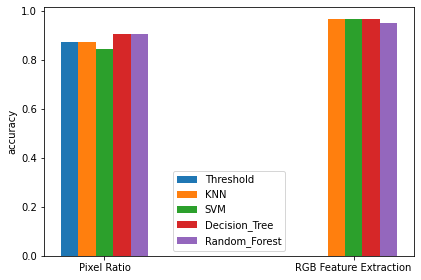

In [88]:
labels = ['Pixel Ratio', 'RGB Feature Extraction']
thresholds = [0.875, 0]
KNN = [0.875, 0.9656168737359144]
SVM = [0.84375 , 0.9656168737359144]
Decision_Tree = [0.90625, 0.9685062120774343]
Random_Forest = [0.90625, 0.9503033805258596]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x - 2*width/5, thresholds, width/5)
plt.bar(x - width/5, KNN, width/5)
plt.bar(x, SVM, width/5)
plt.bar(x + width/5, Decision_Tree, width/5)
plt.bar(x + 2*width/5, Random_Forest, width/5)

# Add some text for labels, title and custom x-axis tick labels, etc
plt.ylabel('accuracy')
plt.xticks(x, labels)
plt.legend(['Threshold', 'KNN', 'SVM', 'Decision_Tree','Random_Forest'])


fig.tight_layout()

plt.show()